In [1]:
import os
import sys
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(repo_root)

from src.utils.file_handlers import read_file_parameters
from src.utils.convergence_test_helpers import test_convergence
from src.utils.file_handlers import read_dataset_files


In [2]:
def stop_array_sequentially(array, threshold=1e-6):
    for i, value in enumerate(array):
        if value < threshold:
            print(i)
            return array[:i]
    return array


In [3]:
data_dir = os.path.join(repo_root, 'datasets', 'Synthetic_Data')

filein_idx = 'N-1000_M-1000_K-5_L-0_nodes.txt'
filein_data = 'N-1000_M-1000_K-5_L-0_edges.txt'

dataset_files = {
    'nodes':filein_idx, 
    'edges': filein_data
    }

data, pi_values = read_dataset_files(dataset_files, data_dir, is_synthetic=True)

In [6]:
ho, z = test_convergence(data, pi_values)

{1: 0.3668957814773844, 2: 0.08924638928303981, 3: 0.017493790722762317, 4: 0.004222554431408374, 5: 0.0012448823874665295, 6: 0.00041896283853073746, 7: 0.000149570880158741, 8: 5.509044226828574e-05, 9: 2.0934816828908447e-05, 10: 8.132922698523538e-06, 11: 3.2302497908814314e-06, 12: 1.307086677897845e-06, 13: 5.38550572820249e-07}


12
67


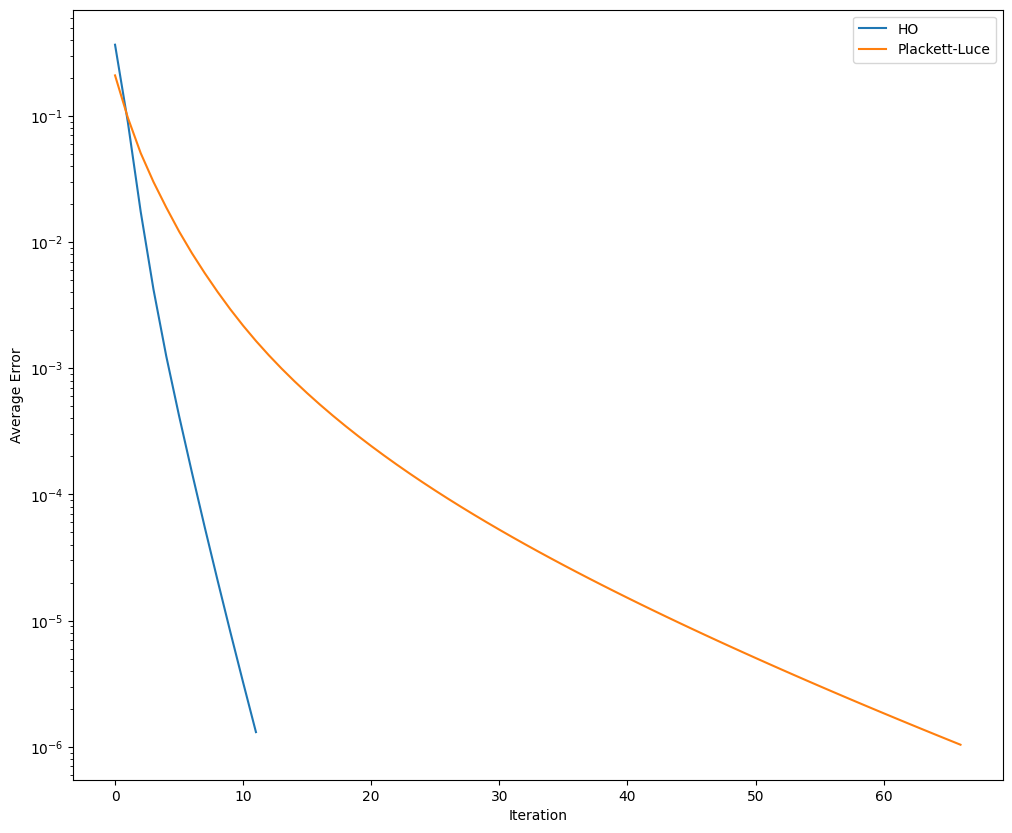

In [7]:

above_thresh_ho = stop_array_sequentially(ho)
above_thresh_PL = stop_array_sequentially(z)

plt.figure(figsize=(12, 10))
plt.yscale('log')
plt.plot(above_thresh_ho, label='HO')
plt.plot(above_thresh_PL, label='Plackett-Luce')
plt.xlabel('Iteration')
plt.ylabel('Average Error')
plt.legend()

# plt.savefig('Convergence')
plt.show()